## Multi-class classification

In this notebook we will use **sklearn** and also implement by hand **one-vs-rest** and **softmax regression** in context of Logistic regression to fit multiple classes. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [16]:
#Plot decision regions - From Python Machine Leaning - Sebastian Raschka & Vahid Mirjalili
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [10]:
#import iris dataset
from sklearn import datasets

iris = datasets.load_iris()
#load only two features
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_test:', np.bincount(y_test))
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y: [50 50 50]
Labels counts in y_test: [15 15 15]
Labels counts in y_train: [35 35 35]


In [21]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Coef =  [[-15.08348975 -10.53030043]
 [  2.44273659  -2.10663158]
 [ 14.74400272   6.81638816]] Intercept =  [-16.32483838  -0.75892486 -13.43660084]


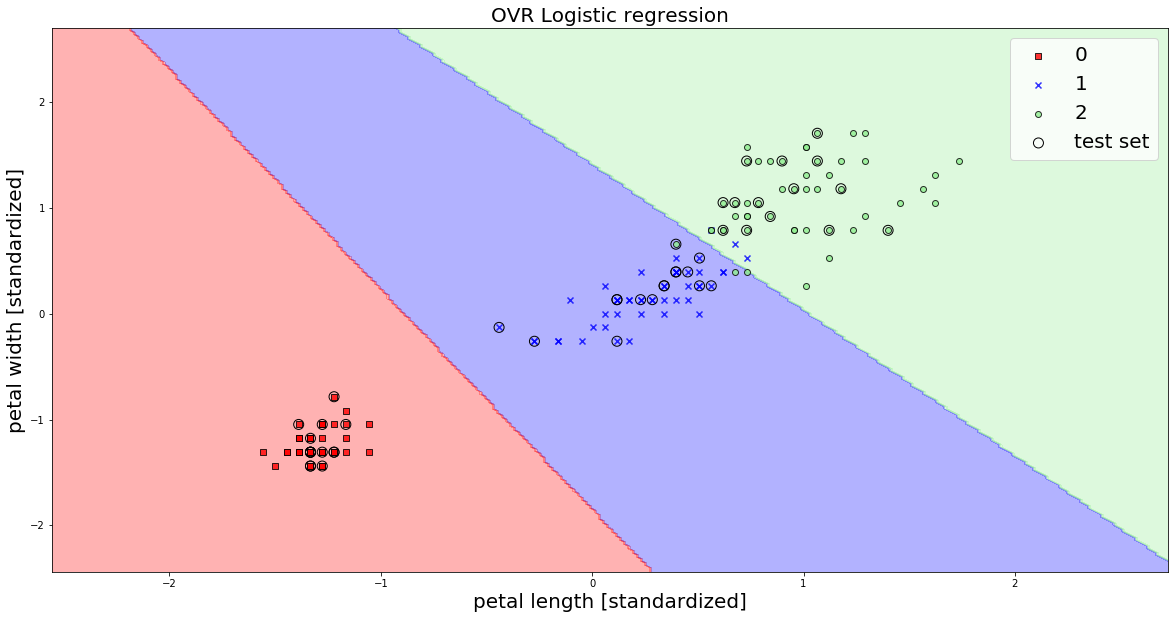

In [49]:
#Lets apply ovr logistics regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none', random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred_train = lr.predict(X_train_std)
y_pred_test = lr.predict(X_test_std)
print("Coef = ", lr.coef_, "Intercept = ", lr.intercept_)

#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('OVR Logistic regression', fontsize=20)

#Confusion matrix
from sklearn.metrics import confusion_matrix
ovr_confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
ovr_confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

Coef =  [[-17.48033743 -13.45032592]
 [  1.36804621   3.31687397]
 [ 16.11229121  10.13345195]] Intercept =  [-10.87244802  12.15465675  -1.28220873]


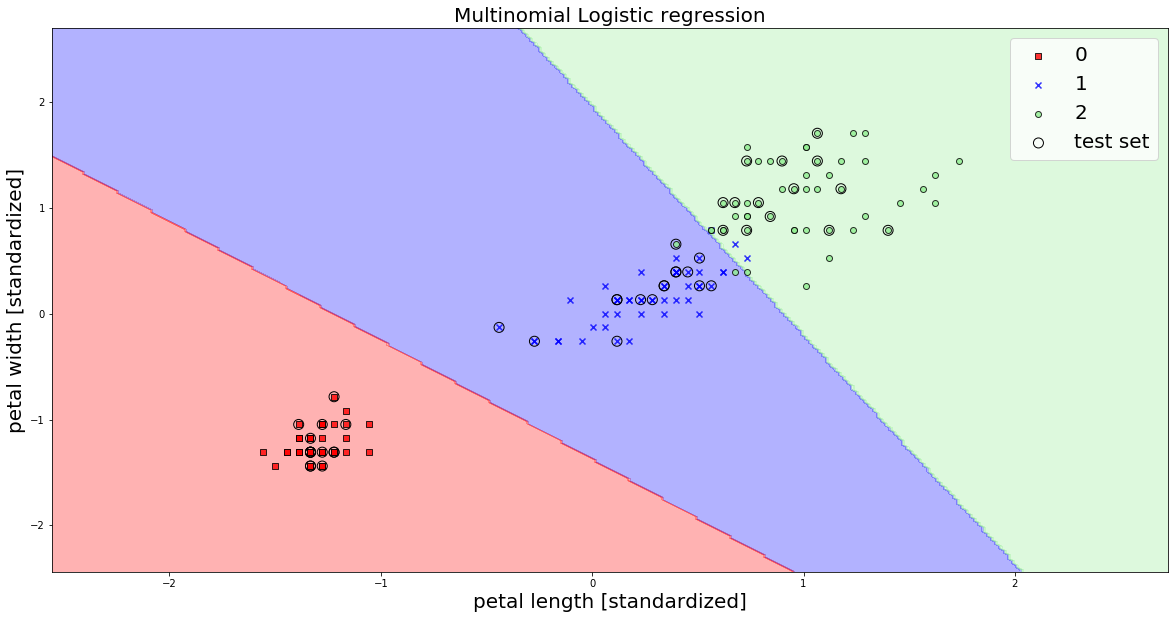

In [50]:
#Multinomial (softmax) logistics regression 
#Lets apply ovr logistics regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none', random_state=1, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)
y_pred_train = lr.predict(X_train_std)
y_pred_test = lr.predict(X_test_std)
print("Coef = ", lr.coef_, "Intercept = ", lr.intercept_)

#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('Multinomial Logistic regression', fontsize=20)

#Confusion matrix
from sklearn.metrics import confusion_matrix
multinomial_confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
multinomial_confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

In [46]:
print("OVR confusion_matrix train:\n", ovr_confusion_matrix_train)
print("OVR confusion_matrix test:\n", ovr_confusion_matrix_test)
print("Multinomial confusion_matrix train:\n", multinomial_confusion_matrix_train)
print("Multinomial confusion_matrix test:\n", multinomial_confusion_matrix_test)

OVR confusion_matrix train:
 [[35  0  0]
 [ 0 32  3]
 [ 0  2 33]]
OVR confusion_matrix test:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Multinomial confusion_matrix train:
 [[35  0  0]
 [ 0 32  3]
 [ 0  1 34]]
Multinomial confusion_matrix test:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


we can see that multinomial has less error in the training set.

### Implementation of softmax and ovr Logistic regression
In the section below we will implement multiclass logistic regression with two strategies softmax and ovr.

In [51]:
#Multi class logistic regression
class MultiClassLogisticRegression():
    
    def __init__(self, multi_class):
        self.multi_class_ = multi_class
    
    def fit(X, y):
        pass
    
    def predict(X):
        pass
    